# Task 02

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/heart_disease.csv")
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [62]:
df["Gender"].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [63]:
df["Exercise Habits"].value_counts()

Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

In [64]:
df['Smoking'].value_counts()

Smoking
Yes    5123
No     4852
Name: count, dtype: int64

In [65]:
df["Family Heart Disease"].value_counts()

Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

In [66]:
df["Diabetes"].value_counts()

Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

In [67]:
df["High Blood Pressure"].value_counts()

High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

In [68]:
df["Low HDL Cholesterol"].value_counts()

Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

In [69]:
df["Alcohol Consumption"].value_counts()

Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

In [70]:
df["Sugar Consumption"].value_counts()

Sugar Consumption
Low       3390
High      3330
Medium    3250
Name: count, dtype: int64

In [71]:
df['Heart Disease Status'].value_counts()

Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

## Step 1: Understanding the Data

Classified features

- Gender : Male / Female
- Exercise Habits : Low / Medium / High
- Alcohol Consumption : Low / Medium / High
- Sugar Consumption : Low / Medium / High
- Smoking : Yes / No
- Family Heart Disease : Yes / No
- Diabetes : Yes / No
- High Blood Pressure : Yes / No
- Low HDL Cholesterol : Yes / No
- High LDL Cholesterol : Yes / No
- Heart Disease Status : Yes / No

Numeric features

- Age
- Blood Pressure
- Cholesterol Level = LDL + HDL + 20% of Triglycerides
- BMI = weight (kg) / height² (m²)
- Triglycleride Level : Type of fat in blood; stores unused calorie
- Sleep Hours
- Fasting Blood Sugar : Blood glucose level after 8–12 hours fasting.
- CRP Level : (C-Reactive Protein) Indicates inflammation in the body
- Homocysteine Level : An amino acid

## Step 2: Removing the incomplete / missing records. 

In [72]:
df.dropna(inplace=True)
df.shape[0]

7067

## Step 3: I am choosing the "Heart Diesease Status" as my target array. It has two classes Yes / No. So it is a classification problem.

In [73]:
# Redundant column : "Blood Pressure" as its qualitative measure High Blood Pressure also given.
df.drop(columns="Blood Pressure", inplace=True)
REC_COUNT = df.shape[0] # column coun should be 20 now (including index)
df.set_index(pd.RangeIndex(0, REC_COUNT, 1), inplace=True)
REC_COUNT

7067

## Step 3: I want to compare status of heart disease based on classified features having two classes only Yes / No

(0.0, 7067.0)

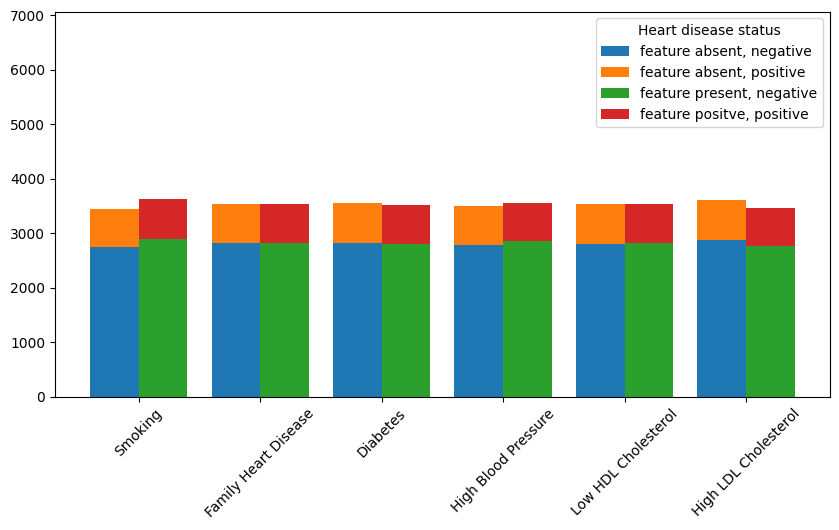

In [74]:
features = ["Smoking", "Family Heart Disease", "Diabetes", "High Blood Pressure", "Low HDL Cholesterol", "High LDL Cholesterol"]

positiveStatus, negativeStatus = {}, {}

for feature in features:
  positiveStatus[feature], negativeStatus[feature] = {}, {}
  # Number of positive status patient in which current feature / habit present
  positiveStatus[feature]['present'] = df.loc[(df[feature] == "Yes") & (df["Heart Disease Status"] == "Yes")].shape[0]
  # Number of positive status patient in which current feature / habit absent
  positiveStatus[feature]['absent'] = df.loc[(df[feature] == "No") & (df["Heart Disease Status"] == "Yes")].shape[0]
  # Number of negative status patient in which current feature / habit present
  negativeStatus[feature]['present'] = df.loc[(df[feature] == "Yes") & (df["Heart Disease Status"] == "No")].shape[0]
  # Number of negative status patient in which current feature / habit absent
  negativeStatus[feature]['absent'] = df.loc[(df[feature] == "No") & (df["Heart Disease Status"] == "No")].shape[0]


width = 0.4

fig, axs = plt.subplots(figsize=(10, 5))
negativeFeaturesAbsent = [negativeStatus[feature]['absent'] for feature in features]
positiveFeaturesAbsent = [positiveStatus[feature]['absent'] for feature in features]
negativeFeaturesPresent = [negativeStatus[feature]['present'] for feature in features]
positiveFeaturesPresent = [positiveStatus[feature]['present'] for feature in features]
axs.bar([x for x in range(len(features))], negativeFeaturesAbsent, width, label="feature absent, negative")
axs.bar([x for x in range(len(features))], positiveFeaturesAbsent, width, bottom=negativeFeaturesAbsent, label="feature absent, positive")
axs.bar([x + width for x in range(len(features))], negativeFeaturesPresent, width, label="feature present, negative")
axs.bar([x + width for x in range(len(features))], positiveFeaturesPresent, width, bottom=negativeFeaturesPresent, label="feature positve, positive")
axs.set_xticks([(x + width / 2) for x in range(len(features))], labels=features, rotation=45)
axs.legend(title="Heart disease status")
axs.set_ylim(0, REC_COUNT)

Text(0.5, 1.0, 'Focusing only on persons having Heart Diseases')

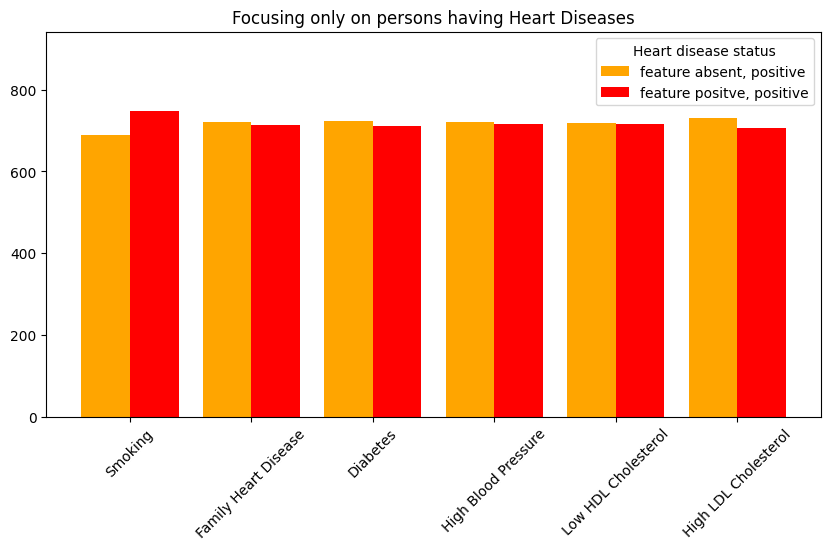

In [75]:
fig, axs = plt.subplots(figsize=(10, 5))
positiveFeaturesAbsent = [positiveStatus[feature]['absent'] for feature in features]
positiveFeaturesPresent = [positiveStatus[feature]['present'] for feature in features]
axs.bar([x for x in range(len(features))], positiveFeaturesAbsent, width, label="feature absent, positive", color="orange")
axs.bar([x + width for x in range(len(features))], positiveFeaturesPresent, width, label="feature positve, positive", color="red")
axs.set_xticks([(x + width / 2) for x in range(len(features))], labels=features, rotation=45)
axs.legend(title="Heart disease status")
axs.set_ylim(0, REC_COUNT / 7.5)
axs.set_title("Focusing only on persons having Heart Diseases")

By observing above graph, it can be inferred that Smoking increases the chances of having heart related diseases. Possible reason might be that smoking damages the lungs, in turn reduces the breathing capacity, in turn the lacks the amount of pressure required to pump the blood through heart. 

## Step 4: I want to a visual comparison of number of positive and negative cases bases on features athat are classsifid into three classes.

(0.0, 4711.333333333333)

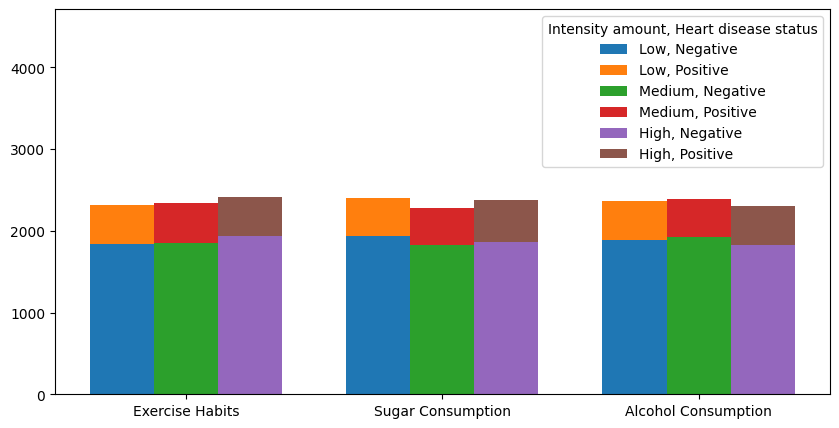

In [76]:
features = ["Exercise Habits", "Sugar Consumption", "Alcohol Consumption"]

positiveStatus, negativeStatus = {}, {}

for feature in features:
  positiveStatus[feature], negativeStatus[feature] = {}, {}
  positiveStatus[feature]['Low'] = df.loc[(df[feature] == "Low") & (df["Heart Disease Status"] == "Yes")].shape[0]
  positiveStatus[feature]['Medium'] = df.loc[(df[feature] == "Medium") & (df["Heart Disease Status"] == "Yes")].shape[0]
  positiveStatus[feature]['High'] = df.loc[(df[feature] == "High") & (df["Heart Disease Status"] == "Yes")].shape[0]
  negativeStatus[feature]['Low'] = df.loc[(df[feature] == "Low") & (df["Heart Disease Status"] == "No")].shape[0]
  negativeStatus[feature]['Medium'] = df.loc[(df[feature] == "Medium") & (df["Heart Disease Status"] == "No")].shape[0]
  negativeStatus[feature]['High'] = df.loc[(df[feature] == "High") & (df["Heart Disease Status"] == "No")].shape[0]

width = 0.25

fig, axs = plt.subplots(figsize=(10, 5))
negativeFeaturesLow = [negativeStatus[feature]["Low"] for feature in features]
negativeFeaturesMedium = [negativeStatus[feature]["Medium"] for feature in features]
negativeFeaturesHigh = [negativeStatus[feature]["High"] for feature in features]
positiveFeaturesLow = [positiveStatus[feature]["Low"] for feature in features]
positiveFeaturesMedium = [positiveStatus[feature]["Medium"] for feature in features]
positiveFeaturesHigh = [positiveStatus[feature]["High"] for feature in features]
axs.bar([i for i in range(len(features))], negativeFeaturesLow, width, label="Low, Negative")
axs.bar([i for i in range(len(features))], positiveFeaturesLow, width, bottom=negativeFeaturesLow, label="Low, Positive")
axs.bar([i + width for i in range(len(features))], negativeFeaturesMedium, width, label="Medium, Negative")
axs.bar([i + width for i in range(len(features))], positiveFeaturesMedium, width, bottom=negativeFeaturesMedium, label="Medium, Positive")
axs.bar([i + 2 * width for i in range(len(features))], negativeFeaturesHigh, width, label="High, Negative")
axs.bar([i + 2 * width for i in range(len(features))], positiveFeaturesHigh, width, bottom=negativeFeaturesHigh, label="High, Positive")
axs.legend(title="Intensity amount, Heart disease status")
axs.set_xticks([i + width for i in range(len(features))], labels=features)
axs.set_ylim(0, REC_COUNT / 1.5)

Text(0.5, 1.0, 'Focusing only on paersons having heart diseases')

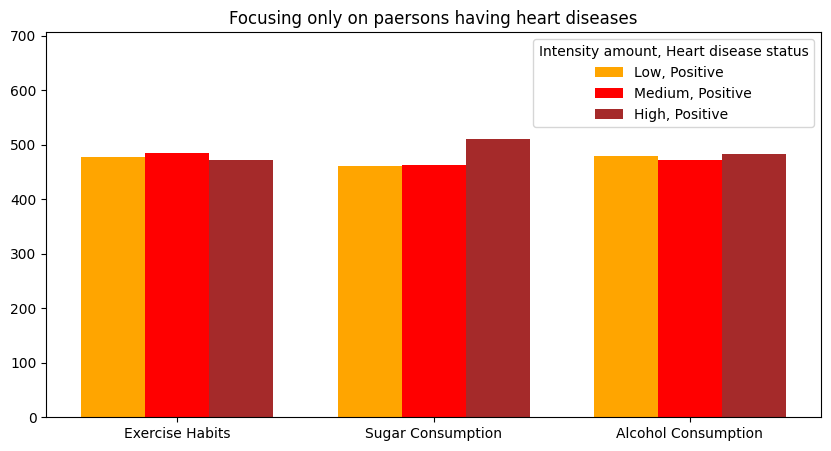

In [77]:
fig, axs = plt.subplots(figsize=(10, 5))
positiveFeaturesLow = [positiveStatus[feature]["Low"] for feature in features]
positiveFeaturesMedium = [positiveStatus[feature]["Medium"] for feature in features]
positiveFeaturesHigh = [positiveStatus[feature]["High"] for feature in features]
axs.bar([i for i in range(len(features))], positiveFeaturesLow, width, label="Low, Positive", color="orange")
axs.bar([i + width for i in range(len(features))], positiveFeaturesMedium, width, label="Medium, Positive", color="red")
axs.bar([i + 2 * width for i in range(len(features))], positiveFeaturesHigh, width, label="High, Positive", color="brown")
axs.legend(title="Intensity amount, Heart disease status")
axs.set_xticks([i + width for i in range(len(features))], labels=features)
axs.set_ylim(0, REC_COUNT / 10)
axs.set_title("Focusing only on paersons having heart diseases")

Sugar consumption increases the chances of having heart diseases